### Comandos básicos para el análisis exploratorio de datos y visualización de activos de renta variable

In [2]:
# Lo primero que hacemos es cargar las librerías deseadas
import yfinance as yf
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# visualizamos todas las columnas de los métodos en análisis 
pd.set_option('display.max_columns', None)

##### Dependiendo las necesidades que tengamos podemos hacer distintos usos de la librería:

* Método download: Nos permite realizar una descarga de datos históricos de un activo o una lista de activos para un intervalo de tiempo
* Método Ticker: Nos permite a acceder a información específica sobre un activo en particular (Balances, diviendos, precios, etc.)
* Método Tickers: Es similar al método Ticker pero nos permite acceder a información específica de una serie de activos

##### Algunas páginas que nos pueden ayudar con la documentación de la API:

* https://www.qmr.ai/yfinance-library-the-definitive-guide/ 
* https://aroussi.com/post/python-yahoo-finance
* https://algotrading101.com/learn/yfinance-guide/
* https://github.com/manursanchez/Practicas_Python_DataScience/blob/main/1.%20Pr%C3%A1ctica%20en%20el%20uso%20de%20la%20librer%C3%ADa%20yfinance.ipynb
* https://github.com/ranaroussi/yfinance
* https://github.com/gauss314/Bursatil-Argentina-Python

##### Agunas consideraciones a tener en cuenta:

* yfinance no es una librería oficial de yahoo finance sino más bien que es el resultado del trabajo de Ran Aroussi.
* El hecho de que no sea una librería oficial hace que no podamos confiar al 100% en esta data y que podamos tener algunos inconvenientes producto de que muchas soluciones son scraps de la página de yahoo finance
* En la wiki del github de ranaroussi podemos obtener documentación extra de los parámetros de cada uno de los métodos que vamos a ver

In [4]:
# Trabajamos con el método ticker
msft = yf.Ticker("MSFT")
msft

yfinance.Ticker object <MSFT>

In [6]:
# Accedemos a la data de mercado del ticker en análisis y comenzamos a análizar como es que se dispone la información de esta biblioteca.
# Por default, el parámetro "interval" esta seteado en '1d'
hist = msft.history(period="1mo")
hist

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,373.859985,375.899994,366.769989,370.869995,25258600,0.0,0.0
2024-01-03 00:00:00-05:00,369.010010,373.260010,368.510010,370.600006,23083500,0.0,0.0
2024-01-04 00:00:00-05:00,370.670013,373.100006,367.170013,367.940002,20901500,0.0,0.0
2024-01-05 00:00:00-05:00,368.970001,372.059998,366.500000,367.750000,20987000,0.0,0.0
2024-01-08 00:00:00-05:00,369.299988,375.200012,369.010010,374.690002,23134000,0.0,0.0
2024-01-09 00:00:00-05:00,372.010010,375.989990,371.190002,375.790009,20830000,0.0,0.0
2024-01-10 00:00:00-05:00,376.369995,384.170013,376.320007,382.769989,25514200,0.0,0.0
2024-01-11 00:00:00-05:00,386.000000,390.679993,380.380005,384.630005,27850800,0.0,0.0
2024-01-12 00:00:00-05:00,385.489990,388.679993,384.649994,388.470001,21645700,0.0,0.0


In [7]:
# Algo relevante es que según la documentación no deberíamos mezclar el parámetro "period" con los parámetros "start" y "end".
# Por ejemplo, podemos hacer lo mismo si...
hist = msft.history(start="2024-01-02", end="2024-02-02")
hist

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,373.859985,375.899994,366.769989,370.869995,25258600,0.0,0.0
2024-01-03 00:00:00-05:00,369.010010,373.260010,368.510010,370.600006,23083500,0.0,0.0
2024-01-04 00:00:00-05:00,370.670013,373.100006,367.170013,367.940002,20901500,0.0,0.0
2024-01-05 00:00:00-05:00,368.970001,372.059998,366.500000,367.750000,20987000,0.0,0.0
2024-01-08 00:00:00-05:00,369.299988,375.200012,369.010010,374.690002,23134000,0.0,0.0
2024-01-09 00:00:00-05:00,372.010010,375.989990,371.190002,375.790009,20830000,0.0,0.0
2024-01-10 00:00:00-05:00,376.369995,384.170013,376.320007,382.769989,25514200,0.0,0.0
2024-01-11 00:00:00-05:00,386.000000,390.679993,380.380005,384.630005,27850800,0.0,0.0
2024-01-12 00:00:00-05:00,385.489990,388.679993,384.649994,388.470001,21645700,0.0,0.0


In [8]:
# También podríamos hacer lo mismo pero con un intervalo menor. EL tema de utilizar intervalos de tiempo distinto es útil
# al momento de realizar estratégias de AT
hist = msft.history(start="2024-01-01", end="2024-02-01", interval='1h')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-01-02 09:30:00-05:00,373.859985,375.899994,366.770996,368.299988,6438914,0.0,0.0
2024-01-02 10:30:00-05:00,368.250000,369.980011,367.000000,369.970001,2726569,0.0,0.0
2024-01-02 11:30:00-05:00,369.959991,371.359985,369.899994,370.476990,1957295,0.0,0.0
2024-01-02 12:30:00-05:00,370.474609,371.019989,369.140015,369.630005,1609221,0.0,0.0
2024-01-02 13:30:00-05:00,369.635010,370.200012,368.890015,369.549988,1243301,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-31 11:30:00-05:00,403.678009,403.804993,402.000000,402.119507,3339540,0.0,0.0
2024-01-31 12:30:00-05:00,402.117004,403.609985,401.320007,403.173187,2988330,0.0,0.0
2024-01-31 13:30:00-05:00,403.200012,403.299988,400.510010,401.220001,3059113,0.0,0.0


In [9]:
# Si queremos analizar multiples activos al mismo tiempo tenemos que hacer uso del método Tickers
assets = ['AMZN','MSFT','WMT','GGAL','META']
tickers = yf.Tickers(assets)
tickers_hist = tickers.history(period='1mo')
tickers_hist

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*******************

Price            Close                                                 \
Ticker            AMZN       GGAL        META        MSFT         WMT   
Date                                                                    
2024-01-02  149.929993  16.959999  346.290009  370.869995  159.289993   
2024-01-03  148.470001  16.780001  344.470001  370.600006  159.300003   
2024-01-04  144.570007  16.240000  347.119995  367.940002  157.759995   
2024-01-05  145.240005  16.490000  351.950012  367.750000  156.710007   
2024-01-08  149.100006  16.600000  358.660004  374.690002  158.250000   
2024-01-09  151.369995  15.490000  357.429993  375.790009  159.309998   
2024-01-10  153.729996  16.090000  370.470001  382.769989  161.289993   
2024-01-11  155.179993  15.780000  369.670013  384.630005  161.110001   
2024-01-12  154.619995  15.980000  374.489990  388.470001  161.320007   
2024-01-16  153.160004  15.680000  367.459991  390.269989  161.830002   
2024-01-17  151.710007  16.260000  368.369995  389.470001  161.070007   
2024-01-18  153.500000  16.670000  376.130005  393.869995  163.240005   
2024-01-19  155.339996  17.190001  383.450012  398.670013  162.380005   
2024-01-22  154.779999  18.180000  381.779999  396.510010  162.389999   
2024-01-23  156.020004  18.389999  385.200012  398.899994  162.800003   
2024-01-24  156.869995  19.000000  390.700012  402.559998  160.500000   
2024-01-25  157.750000  20.320000  393.179993  404.869995  162.839996   
2024-01-26  159.119995  21.280001  394.140015  403.929993  164.270004   
2024-01-29  161.259995  21.280001  401.019989  409.720001  165.039993   
2024-01-30  159.000000  21.500000  400.059998  408.589996  165.589996   
2024-01-31  155.199997  21.610001  390.140015  397.579987  165.250000   
2024-02-01  159.279999  21.830000  394.779999  403.779999  168.309998   
2024-02-02  171.985001  21.812000  475.829987  411.458313  170.294998   

Price      Dividends                            High                         \
Ticker          AMZN GGAL META MSFT  WMT        AMZN       GGAL        META   
Date                                                                          
2024-01-02       0.0  0.0  0.0  0.0  0.0  152.380005  17.309999  353.160004   
2024-01-03       0.0  0.0  0.0  0.0  0.0  151.050003  17.209999  347.950012   
2024-01-04       0.0  0.0  0.0  0.0  0.0  147.380005  17.049999  348.149994   
2024-01-05       0.0  0.0  0.0  0.0  0.0  146.589996  16.639999  353.500000   
2024-01-08       0.0  0.0  0.0  0.0  0.0  149.399994  16.639999  358.980011   
2024-01-09       0.0  0.0  0.0  0.0  0.0  151.710007  16.480000  360.640015   
2024-01-10       0.0  0.0  0.0  0.0  0.0  154.419998  16.129999  372.940002   
2024-01-11       0.0  0.0  0.0  0.0  0.0  157.169998  16.600000  372.779999   
2024-01-12       0.0  0.0  0.0  0.0  0.0  156.199997  16.280001  377.059998   
2024-01-16       0.0  0.0  0.0  0.0  0.0  154.990005  16.000000  375.609985   
2024-01-17       0.0  0.0  0.0  0.0  0.0  152.149994  16.270000  368.540009   
2024-01-18       0.0  0.0  0.0  0.0  0.0  153.779999  16.709999  376.850006   
2024-01-19       0.0  0.0  0.0  0.0  0.0  155.759995  17.270000  384.359985   
2024-01-22       0.0  0.0  0.0  0.0  0.0  157.050003  18.500000  390.350006   
2024-01-23       0.0  0.0  0.0  0.0  0.0  156.210007  18.520000  388.380005   
2024-01-24       0.0  0.0  0.0  0.0  0.0  158.509995  19.370001  396.149994   
2024-01-25       0.0  0.0  0.0  0.0  0.0  158.509995  20.320000  395.489990   
2024-01-26       0.0  0.0  0.0  0.0  0.0  160.720001  21.309999  396.790009   
2024-01-29       0.0  0.0  0.0  0.0  0.0  161.289993  21.360001  402.929993   
2024-01-30       0.0  0.0  0.0  0.0  0.0  161.729996  21.980000  406.359985   
2024-01-31       0.0  0.0  0.0  0.0  0.0  159.009995  22.260000  398.000000   
2024-02-01       0.0  0.0  0.0  0.0  0.0  159.759995  22.049999  400.500000   
2024-02-02       0.0  0.0  0.0  0.0  0.0  172.500000  21.959999  485.959900   

Price                                      Low

In [11]:
# Esto es algo que ocurre en python que nos permite trabajar con múltiples índices. En este caso tenemos un indice en las filas (date)
# y tenemos varios indices en las columnas. Una método útil de pandas para modelar esto es "stack". Es como que funciona para refundir 
# el indice de las columnas en filas.
tickers_hist.stack(future_stack=True, level=1)

Price                   Close  Dividends        High         Low        Open  \
Date       Ticker                                                              
2024-01-02 AMZN    149.929993        0.0  152.380005  148.389999  151.539993   
           GGAL     16.959999        0.0   17.309999   16.709999   17.150000   
           META    346.290009        0.0  353.160004  340.010010  351.320007   
           MSFT    370.869995        0.0  375.899994  366.769989  373.859985   
           WMT     159.289993        0.0  159.539993  157.190002  157.250000   
...                       ...        ...         ...         ...         ...   
2024-02-02 AMZN    171.985001        0.0  172.500000  167.330002  169.190002   
           GGAL     21.812000        0.0   21.959999   21.420000   21.600000   
           META    475.829987        0.0  485.959900  453.010010  459.600006   
           MSFT    411.458313        0.0  412.420013  403.559998  403.809998   
           WMT     170.294998        0.0  170.574997  167.920105  168.149994   

Price              Stock Splits    Volume  
Date       Ticker                          
2024-01-02 AMZN             0.0  47339400  
           GGAL             0.0    984200  
           META             0.0  19042200  
           MSFT             0.0  25258600  
           WMT              0.0   7846600  
...                         ...       ...  
2024-02-02 AMZN             0.0  91339356  
           GGAL             0.0    422011  
           META             0.0  70689759  
           MSFT             0.0  18857922  
           WMT              0.0   4563753  

[115 rows x 7 columns]

In [12]:
# Por otro lado, podemos eliminar indices con la función "reset_index". Esta función es como que funciona sobre los indices de las filas
tickers_hist.stack(future_stack=True, level=1).reset_index(level=1)

Price,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2024-01-02,AMZN,149.929993,0.0,152.380005,148.389999,151.539993,0.0,47339400
2024-01-02,GGAL,16.959999,0.0,17.309999,16.709999,17.150000,0.0,984200
2024-01-02,META,346.290009,0.0,353.160004,340.010010,351.320007,0.0,19042200
2024-01-02,MSFT,370.869995,0.0,375.899994,366.769989,373.859985,0.0,25258600
2024-01-02,WMT,159.289993,0.0,159.539993,157.190002,157.250000,0.0,7846600
...,...,...,...,...,...,...,...,...
2024-02-02,AMZN,171.985001,0.0,172.500000,167.330002,169.190002,0.0,91339356
2024-02-02,GGAL,21.812000,0.0,21.959999,21.420000,21.600000,0.0,422011
2024-02-02,META,475.829987,0.0,485.959900,453.010010,459.600006,0.0,70689759


In [13]:
# No obstante, esto lo podemos hacer con varios niveles...
tickers_final = tickers_hist.stack(future_stack=True, level=1).reset_index(level=[0,1])
tickers_final

Price,Date,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,2024-01-02,AMZN,149.929993,0.0,152.380005,148.389999,151.539993,0.0,47339400
1,2024-01-02,GGAL,16.959999,0.0,17.309999,16.709999,17.150000,0.0,984200
2,2024-01-02,META,346.290009,0.0,353.160004,340.010010,351.320007,0.0,19042200
3,2024-01-02,MSFT,370.869995,0.0,375.899994,366.769989,373.859985,0.0,25258600
4,2024-01-02,WMT,159.289993,0.0,159.539993,157.190002,157.250000,0.0,7846600
...,...,...,...,...,...,...,...,...,...
110,2024-02-02,AMZN,171.985001,0.0,172.500000,167.330002,169.190002,0.0,91339356
111,2024-02-02,GGAL,21.812000,0.0,21.959999,21.420000,21.600000,0.0,422011
112,2024-02-02,META,475.829987,0.0,485.959900,453.010010,459.600006,0.0,70689759
113,2024-02-02,MSFT,411.458313,0.0,412.420013,403.559998,403.809998,0.0,18857922


In [14]:
# En caso que querramos descargarnos esta información podemos utilizar el método de pandas "to_csv"
tickers_final.to_csv("tickers.csv")

In [15]:
# La última función que vimos podemos utilizar para descargar datos es el método download
data_ggal = yf.download('GGAL.BA', period='1mo')
data_ggal

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,1688.000000,1717.000000,1636.400024,1685.949951,1685.949951,1191579
2024-01-03,1699.000000,1774.000000,1665.000000,1771.699951,1771.699951,2231061
2024-01-04,1772.000000,1839.000000,1758.000000,1800.550049,1800.550049,3024680
2024-01-05,1800.000000,1904.000000,1771.000000,1889.199951,1889.199951,2656526
2024-01-08,1894.000000,2000.000000,1856.000000,1997.199951,1997.199951,1733177
2024-01-09,2010.000000,2015.000000,1875.000000,1892.250000,1892.250000,1929695
2024-01-10,1875.000000,1926.500000,1850.000000,1918.449951,1918.449951,2436512
2024-01-11,1944.000000,1975.000000,1830.000000,1844.449951,1844.449951,2360167
2024-01-12,1850.000000,1888.000000,1825.000000,1851.250000,1851.250000,1183380


In [13]:
# Esto mismo también lo podemos hacer con multiples activos
tickers_hist_download = yf.download(assets, period='1mo', auto_adjust=True)
tickers_hist_download

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*******************

Price            Close                                                 \
Ticker            AMZN       GGAL        META        MSFT         WMT   
Date                                                                    
2024-01-02  149.929993  16.959999  346.290009  370.869995  159.289993   
2024-01-03  148.470001  16.780001  344.470001  370.600006  159.300003   
2024-01-04  144.570007  16.240000  347.119995  367.940002  157.759995   
2024-01-05  145.240005  16.490000  351.950012  367.750000  156.710007   
2024-01-08  149.100006  16.600000  358.660004  374.690002  158.250000   
2024-01-09  151.369995  15.490000  357.429993  375.790009  159.309998   
2024-01-10  153.729996  16.090000  370.470001  382.769989  161.289993   
2024-01-11  155.179993  15.780000  369.670013  384.630005  161.110001   
2024-01-12  154.619995  15.980000  374.489990  388.470001  161.320007   
2024-01-16  153.160004  15.680000  367.459991  390.269989  161.830002   
2024-01-17  151.710007  16.260000  368.369995  389.470001  161.070007   
2024-01-18  153.500000  16.670000  376.130005  393.869995  163.240005   
2024-01-19  155.339996  17.190001  383.450012  398.670013  162.380005   
2024-01-22  154.779999  18.180000  381.779999  396.510010  162.389999   
2024-01-23  156.020004  18.389999  385.200012  398.899994  162.800003   
2024-01-24  156.869995  19.000000  390.700012  402.559998  160.500000   
2024-01-25  157.750000  20.320000  393.179993  404.869995  162.839996   
2024-01-26  159.119995  21.280001  394.140015  403.929993  164.270004   
2024-01-29  161.259995  21.280001  401.019989  409.720001  165.039993   
2024-01-30  159.000000  21.500000  400.059998  408.589996  165.589996   
2024-01-31  155.199997  21.610001  390.140015  397.579987  165.250000   
2024-02-01  159.279999  21.830000  394.779999  403.779999  168.309998   
2024-02-02  172.371002  21.870001  484.975006  411.429993  169.139801   

Price             High                                                 \
Ticker            AMZN       GGAL        META        MSFT         WMT   
Date                                                                    
2024-01-02  152.380005  17.309999  353.160004  375.899994  159.539993   
2024-01-03  151.050003  17.209999  347.950012  373.260010  160.300003   
2024-01-04  147.380005  17.049999  348.149994  373.100006  159.539993   
2024-01-05  146.589996  16.639999  353.500000  372.059998  158.100006   
2024-01-08  149.399994  16.639999  358.980011  375.200012  158.289993   
2024-01-09  151.710007  16.480000  360.640015  375.989990  159.339996   
2024-01-10  154.419998  16.129999  372.940002  384.170013  161.500000   
2024-01-11  157.169998  16.600000  372.779999  390.679993  161.889999   
2024-01-12  156.199997  16.280001  377.059998  388.679993  161.539993   
2024-01-16  154.990005  16.000000  375.609985  394.029999  162.399994   
2024-01-17  152.149994  16.270000  368.540009  390.109985  161.990005   
2024-01-18  153.779999  16.709999  376.850006  393.989990  163.389999   
2024-01-19  155.759995  17.270000  384.359985  398.670013  163.570007   
2024-01-22  157.050003  18.500000  390.350006  400.619995  162.949997   
2024-01-23  156.210007  18.520000  388.380005  399.380005  162.850006   
2024-01-24  158.509995  19.370001  396.149994  405.630005  163.070007   
2024-01-25  158.509995  20.320000  395.489990  407.010010  162.869995   
2024-01-26  160.720001  21.309999  396.790009  406.170013  164.380005   
2024-01-29  161.289993  21.360001  402.929993  409.980011  165.410004   
2024-01-30  161.729996  21.980000  406.359985  413.049988  165.809998   
2024-01-31  159.009995  22.260000  398.000000  415.320007  167.800003   
2024-02-01  159.759995  22.049999  400.500000  408.000000  168.350006   
2024-02-02  172.490005  21.940001  485.959900  411.700012  169.259598   

Price              Low                                                 \
Ticker            AMZN       GGAL        META        MSFT         WMT   
Date                                                    

In [14]:
# Vemos que acá tenemos el mismo inconveniente que teníamos antes. En esteo caso, esta función tiene un parámetro que se llama "groupby"
# que nos permite agrupar la información por ticker
tickers_hist_download = yf.download(assets, period='1mo', auto_adjust=True, group_by='tickers')
tickers_hist_download

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*******************

Ticker             WMT                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2024-01-02  157.250000  159.539993  157.190002  159.289993  7846600   
2024-01-03  159.770004  160.300003  158.929993  159.300003  6252000   
2024-01-04  159.210007  159.539993  157.490005  157.759995  6427500   
2024-01-05  157.919998  158.100006  155.600006  156.710007  7235600   
2024-01-08  156.699997  158.289993  156.679993  158.250000  6893600   
2024-01-09  157.929993  159.339996  157.729996  159.309998  7774100   
2024-01-10  159.559998  161.500000  159.559998  161.289993  6707300   
2024-01-11  161.350006  161.889999  160.169998  161.110001  4785100   
2024-01-12  161.369995  161.539993  160.380005  161.320007  4542600   
2024-01-16  161.440002  162.399994  161.229996  161.830002  5677500   
2024-01-17  161.380005  161.990005  160.630005  161.070007  4942600   
2024-01-18  161.160004  163.389999  160.679993  163.240005  6063500   
2024-01-19  163.429993  163.570007  161.440002  162.380005  6389800   
2024-01-22  162.789993  162.949997  161.500000  162.389999  4646100   
2024-01-23  162.119995  162.850006  161.770004  162.800003  4022200   
2024-01-24  162.899994  163.070007  160.320007  160.500000  7644300   
2024-01-25  161.399994  162.869995  160.419998  162.839996  5456500   
2024-01-26  163.050003  164.380005  162.660004  164.270004  5248800   
2024-01-29  164.350006  165.410004  163.520004  165.039993  6080100   
2024-01-30  164.699997  165.809998  163.619995  165.589996  5090000   
2024-01-31  167.800003  167.800003  165.110001  165.250000  8711600   
2024-02-01  165.699997  168.350006  165.179993  168.309998  6925100   
2024-02-02  168.149994  169.259598  167.919998  169.139801  2685072   

Ticker            AMZN                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2024-01-02  151.539993  152.380005  148.389999  149.929993  47339400   
2024-01-03  149.199997  151.050003  148.330002  148.470001  49425500   
2024-01-04  145.589996  147.380005  144.050003  144.570007  56039800   
2024-01-05  144.690002  146.589996  144.529999  145.240005  45124800   
2024-01-08  146.740005  149.399994  146.149994  149.100006  46757100   
2024-01-09  148.330002  151.710007  148.210007  151.369995  43812600   
2024-01-10  152.059998  154.419998  151.880005  153.729996  44421800   
2024-01-11  155.039993  157.169998  153.119995  155.179993  49072700   
2024-01-12  155.389999  156.199997  154.009995  154.619995  40460300   
2024-01-16  153.529999  154.990005  152.149994  153.160004  41384600   
2024-01-17  151.490005  152.149994  149.910004  151.710007  34953400   
2024-01-18  152.770004  153.779999  151.820007  153.500000  37850200   
2024-01-19  153.830002  155.759995  152.740005  155.339996  51033700   
2024-01-22  156.889999  157.050003  153.899994  154.779999  43687500   
2024-01-23  154.850006  156.210007  153.929993  156.020004  37986000   
2024-01-24  157.800003  158.509995  156.479996  156.869995  48547300   
2024-01-25  156.949997  158.509995  154.550003  157.750000  43638600   
2024-01-26  158.419998  160.720001  157.910004  159.119995  51047400   
2024-01-29  159.339996  161.289993  158.899994  161.259995  45270400   
2024-01-30  160.699997  161.729996  158.490005  159.000000  45207400   
2024-01-31  157.000000  159.009995  154.809998  155.199997  50284400   
2024-02-01  155.869995  159.759995  155.619995  159.279999  75180500   
2024-02-02  169.190002  172.490005  167.330002  172.410004  71445475   

Ticker            META                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2024-01-02  351.320007  353.160004  340.010010  346.290009  1904

##### Sobre el método Ticker podemos obtener fundamental data para realizar AF

In [15]:
# Traemos todos los datos juntos en formato json del activo en análisis
info_msft = msft.info

In [16]:
# Vemos de convertir esta información a un data frame para trabajarla de otra forma:
df_msft = pd.DataFrame([info_msft])
df_msft.head(10)

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,sector,sectorKey,sectorDisp,longBusinessSummary,fullTimeEmployees,companyOfficers,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,compensationAsOfEpochDate,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendRate,trailingAnnualDividendYield,currency,enterpriseValue,profitMargins,floatShares,sharesOutstanding,sharesShort,sharesShortPriorMonth,sharesShortPreviousMonthDate,dateShortInterest,sharesPercentSharesOut,heldPercentInsiders,heldPercentInstitutions,shortRatio,shortPercentOfFloat,impliedSharesOutstanding,bookValue,priceToBook,lastFiscalYearEnd,nextFiscalYearEnd,mostRecentQuarter,earningsQuarterlyGrowth,netIncomeToCommon,trailingEps,forwardEps,pegRatio,lastSplitFactor,lastSplitDate,enterpriseToRevenue,enterpriseToEbitda,52WeekChange,SandP52WeekChange,lastDividendValue,lastDividendDate,exchange,quoteType,symbol,underlyingSymbol,shortName,longName,firstTradeDateEpochUtc,timeZoneFullName,timeZoneShortName,uuid,messageBoardId,gmtOffSetMilliseconds,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,quickRatio,currentRatio,totalRevenue,debtToEquity,revenuePerShare,returnOnAssets,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,Technology,technology,Technology,Microsoft Corporation develops and supports so...,221000,"[{'maxAge': 1, 'name': 'Mr. Satya Nadella', '...",2,5,2,2,1,1706745600,1703980800,86400,2,403.78,403.81,403.56,411.7,403.78,403.81,403.56,411.7,3.0,0.0074,1707868800,0.2523,0.98,0.876,37.204517,33.23764,13826379,13826379,26104226,27694690,27694690,410.65,410.73,1000,900,3057492164608,245.61,415.32,13.434625,381.173,341.92096,2.86,0.007083,USD,3030637608960,0.36269,7422708575,7430439936,51901029,53704127,1702598400,1705017600,0.007,0.00056,0.73011,2.07,0.007,7430439936,32.06,12.834746,1688083200,1719705600,1703980800,0.332,82541002752,11.06,12.38,2.49,2:1,1045526400,13.317,25.591,0.562919,0.186079,0.75,1700006400,NMS,EQUITY,MSFT,MSFT,Microsoft Corporation,Microsoft Corporation,511108200,America/New_York,EST,b004b3ec-de24-385e-b2c1-923f10d3fb62,finmb_21835,-18000000,411.482,477.6,275.92,416.02,421.14,1.7,buy,44,80981999616,10.899,118427000832,111358001152,1.096,1.218,227583000576,46.736,30.612,0.1519,0.39174,58680999936,102646996992,0.332,0.176,0.69815,0.52037,0.43586,USD,2.4029


In [17]:
# Vemos como normalizar la información que nos llega en formato json. El formato json significa "JavaScript Objet Notation" y es similar
# a una lista de diccionarios en python. Podemos modificar esto dentro del dataFrame haciendo lo siguiente. Esto nos va a crear una nueva
# columna por cada nuevo diccionario que tengamos.
df_normalized = pd.concat([df_msft.drop(['companyOfficers'], axis=1),
                          json_normalize(df_msft['companyOfficers'])],
                          axis=1)
df_normalized.head(10)

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,sector,sectorKey,sectorDisp,longBusinessSummary,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,compensationAsOfEpochDate,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendRate,trailingAnnualDividendYield,currency,enterpriseValue,profitMargins,floatShares,sharesOutstanding,sharesShort,sharesShortPriorMonth,sharesShortPreviousMonthDate,dateShortInterest,sharesPercentSharesOut,heldPercentInsiders,heldPercentInstitutions,shortRatio,shortPercentOfFloat,impliedSharesOutstanding,bookValue,priceToBook,lastFiscalYearEnd,nextFiscalYearEnd,mostRecentQuarter,earningsQuarterlyGrowth,netIncomeToCommon,trailingEps,forwardEps,pegRatio,lastSplitFactor,lastSplitDate,enterpriseToRevenue,enterpriseToEbitda,52WeekChange,SandP52WeekChange,lastDividendValue,lastDividendDate,exchange,quoteType,symbol,underlyingSymbol,shortName,longName,firstTradeDateEpochUtc,timeZoneFullName,timeZoneShortName,uuid,messageBoardId,gmtOffSetMilliseconds,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,quickRatio,currentRatio,totalRevenue,debtToEquity,revenuePerShare,returnOnAssets,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,0,1,2,3,4,5,6,7,8,9
0,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,Technology,technology,Technology,Microsoft Corporation develops and supports so...,221000,2,5,2,2,1,1706745600,1703980800,86400,2,403.78,403.81,403.56,411.7,403.78,403.81,403.56,411.7,3.0,0.0074,1707868800,0.2523,0.98,0.876,37.204517,33.23764,13826379,13826379,26104226,27694690,27694690,410.65,410.73,1000,900,3057492164608,245.61,415.32,13.434625,381.173,341.92096,2.86,0.007083,USD,3030637608960,0.36269,7422708575,7430439936,51901029,53704127,1702598400,1705017600,0.007,0.00056,0.73011,2.07,0.007,7430439936,32.06,12.834746,1688083200,1719705600,1703980800,0.332,82541002752,11.06,12.38,2.49,2:1,1045526400,13.317,25.591,0.562919,0.186079,0.75,1700006400,NMS,EQUITY,MSFT,MSFT,Microsoft Corporation,Microsoft Corporation,511108200,America/New_York,EST,b004b3ec-de24-385e-b2c1-923f10d3fb62,finmb_21835,-18000000,411.482,477.6,275.92,416.02,421.14,1.7,buy,44,80981999616,10.899,118427000832,111358001152,1.096,1.218,227583000576,46.736,30.612,0.1519,0.39174,58680999936,102646996992,0.332,0.176,0.69815,0.52037,0.43586,USD,2.4029,"{'maxAge': 1, 'name': 'Mr. Satya Nadella', 'a...","{'maxAge': 1, 'name': 'Mr. Bradford L. Smith L...","{'maxAge': 1, 'name': 'Ms. Amy E. Hood', 'age'...","{'maxAge': 1, 'name': 'Mr. Judson B. Althoff',...","{'maxAge': 1, 'name': 'Mr. Christopher David Y...","{'maxAge': 1, 'name': 'Ms. Alice L. Jolla', 'a...","{'maxAge': 1, 'name': 'Mr. James Kevin Scott',...","{'maxAge': 1, 'name': 'Brett Iversen', 'title...","{'maxAge': 1, 'name': 'Mr. Hossein Nowbar', '...","{'maxAge': 1, 'name': 'Mr. Frank X. Shaw', 'ti..."


In [21]:
# Si queremos acceder a los datos de forma particular sobre una acción podemos directamente acceder a las columnas del data frame
print(info_msft['dividendRate'])

# Otra forma es directamente utilizar los métodos sobre la opción ticker
print(msft.info['dividendRate'])

3.0
3.0


In [22]:
# También podemos ver la capitalización de mercado de este activo
print(info_msft['marketCap'])

# Otra forma es directamente utilizar los métodos sobre la opción ticker
print(msft.info['marketCap'])

3057492164608
3057492164608


In [25]:
# También podemos ver el beta de mercado de este activo
print(info_msft['beta'])

# Otra forma es directamente utilizar los métodos sobre la opción ticker
print(msft.info['beta'])

0.876
0.876


In [24]:
# También podemos ver el price to earnings del este activo
print(info_msft['forwardPE'])

# Otra forma es directamente utilizar los métodos sobre la opción ticker
print(msft.info['forwardPE'])

33.23764
33.23764


In [27]:
# Sobre el mimsmo ticker si tocamos tab nos salen varias opciones que podemos hacear click para analizar el activo
msft.balancesheet

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,111256000000.0,104749000000.0,130256000000.0,136527000000.0
Other Short Term Investments,76552000000.0,90818000000.0,116032000000.0,122951000000.0
Cash And Cash Equivalents,34704000000.0,13931000000.0,14224000000.0,13576000000.0
Cash Equivalents,26226000000.0,5673000000.0,6952000000.0,7666000000.0


In [30]:
# Sucede que al ser una librería no oficial, existen actualmente diversas opciones de como acceder a los datos.
# Esta misma información es la que podemos obtener de: https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT
msft.get_balance_sheet()

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
OrdinarySharesNumber,7432000000.0,7464000000.0,7519000000.0,7571000000.0
ShareIssued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
NetDebt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
TotalDebt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
TangibleBookValue,128971000000.0,87720000000.0,84477000000.0,67915000000.0
...,...,...,...,...
CashCashEquivalentsAndShortTermInvestments,111256000000.0,104749000000.0,130256000000.0,136527000000.0
OtherShortTermInvestments,76552000000.0,90818000000.0,116032000000.0,122951000000.0
CashAndCashEquivalents,34704000000.0,13931000000.0,14224000000.0,13576000000.0
CashEquivalents,26226000000.0,5673000000.0,6952000000.0,7666000000.0


In [36]:
# También podemos tener esta misma visión pero en forma de trimestres
msft.quarterly_balancesheet

,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Ordinary Shares Number,7432262329.0,7431000000.0,7432000000.0,7437000000.0,7447000000.0
Share Issued,7432262329.0,7431000000.0,7432000000.0,7437000000.0,7447000000.0
Net Debt,56914000000.0,NaN,12533000000.0,21648000000.0,32470000000.0
Total Debt,88374000000.0,84989000000.0,59965000000.0,60522000000.0,60114000000.0
Tangible Book Value,89441000000.0,144029000000.0,128971000000.0,116864000000.0,104876000000.0
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,80982000000.0,143945000000.0,111256000000.0,104419000000.0,99495000000.0
Other Short Term Investments,63677000000.0,63493000000.0,76552000000.0,77857000000.0,83849000000.0
Cash And Cash Equivalents,17305000000.0,80452000000.0,34704000000.0,26562000000.0,15646000000.0
Cash Equivalents,7769000000.0,73074000000.0,26226000000.0,18053000000.0,8342000000.0


In [32]:
# También podemos ver el cashflow de la empresa. Que coincide con: https://finance.yahoo.com/quote/MSFT/cash-flow?p=MSFT
msft.get_cashflow()

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
FreeCashFlow,59475000000.0,65149000000.0,56118000000.0,45234000000.0
RepurchaseOfCapitalStock,-22245000000.0,-32696000000.0,-27385000000.0,-22968000000.0
RepaymentOfDebt,-2750000000.0,-9023000000.0,-3750000000.0,-5518000000.0
IssuanceOfDebt,NaN,NaN,NaN,0.0
IssuanceOfCapitalStock,1866000000.0,1841000000.0,1693000000.0,1343000000.0
CapitalExpenditure,-28107000000.0,-23886000000.0,-20622000000.0,-15441000000.0
EndCashPosition,34704000000.0,13931000000.0,14224000000.0,13576000000.0
BeginningCashPosition,13931000000.0,14224000000.0,13576000000.0,11356000000.0
EffectOfExchangeRateChanges,-194000000.0,-141000000.0,-29000000.0,-201000000.0
ChangesInCash,20967000000.0,-152000000.0,677000000.0,2421000000.0


In [39]:
# Algo importante también es poder ver los fondos institucionales que tienen mayor porcentaje del paquete accionario
# Esto también lo podemos ver: https://finance.yahoo.com/quote/MSFT/holders?p=MSFT
msft.get_institutional_holders()

,Date Reported,Holder,pctHeld,Shares,Value
0,2023-06-30,Vanguard Group Inc,0.0879,653247546,222456919314
1,2023-06-30,Blackrock Inc.,0.0722,536245027,182612881494
2,2023-06-30,State Street Corporation,0.0395,293614078,99987338122
3,2023-06-30,"FMR, LLC",0.0283,210111250,71551285075
4,2023-06-30,Price (T.Rowe) Associates Inc,0.0215,159904219,54453782738
5,2023-06-30,"Geode Capital Management, LLC",0.0199,148129470,50444009713
6,2023-06-30,Morgan Stanley,0.0166,123498322,42056118573
7,2023-06-30,JP Morgan Chase & Company,0.0152,113024837,38489477991
8,2022-12-31,Norges Bank Investment Management,0.0116,86316926,20700525193
9,2023-06-30,Capital World Investors,0.0115,85507261,29118642660


In [43]:
# Esta misma información la podemos disponibilizar para poder acceder para multiples activos. Para eso vamos a introducir
# para que sirven los bucles for:
for i in assets:
    print(i)

AMZN
MSFT
WMT
GGAL
META


In [67]:
# El método from_dict nos facilita el pasaje a dataframes desde un diccionario. Por otro lado, el parámetro concat es 
# necesario que se le específique axis = 1 si queremos concatenar columnas y no filas. La consulta quedaría así:
info_tickers_final = pd.DataFrame()
x = 0

for i in assets:

    if x == 0:
        ticker_asset = yf.Ticker(i)
        ticker_asset_t = pd.DataFrame.from_dict(ticker_asset.info, orient="index")
        ticker_asset_t.reset_index(inplace=True)
        ticker_asset_t.columns = ["Atributo", i]
        info_tickers_final = pd.concat([info_tickers_final, ticker_asset_t], axis = 1)
        x = 1
    else:
        ticker_asset = yf.Ticker(i)
        ticker_asset_t = pd.DataFrame.from_dict(ticker_asset.info, orient="index")
        ticker_asset_t.reset_index(inplace=True)
        ticker_asset_t.columns = ["Atributo", i]
        info_tickers_final = pd.concat([info_tickers_final, ticker_asset_t[i]], axis = 1)

info_tickers_final.head(20)

,Atributo,AMZN,MSFT,WMT,GGAL,META
0,address1,410 Terry Avenue North,One Microsoft Way,702 South West 8th Street,Teniente General Juan D. PerOn 430,1601 Willow Road
1,city,Seattle,Redmond,Bentonville,25th Floor,Menlo Park
2,state,WA,WA,AR,Buenos Aires,CA
3,zip,98109-5210,98052-6399,72716,1038,94025
4,country,United States,United States,United States,Argentina,United States
5,phone,206 266 1000,425 882 8080,479 273 4000,54 11 4343 7528,650 543 4800
6,website,https://www.aboutamazon.com,https://www.microsoft.com,https://www.stock.walmart.com,54 11 4331 9183,https://investor.fb.com
7,industry,Internet Retail,Software - Infrastructure,Discount Stores,https://www.gfgsa.com,Internet Content & Information
8,industryKey,internet-retail,software-infrastructure,discount-stores,Banks - Regional,internet-content-information
9,industryDisp,Internet Retail,Software - Infrastructure,Discount Stores,banks-regional,Internet Content & Information


##### Hacemos gráficos sobre los activos que visualizamos

<function matplotlib.pyplot.show(close=None, block=None)>

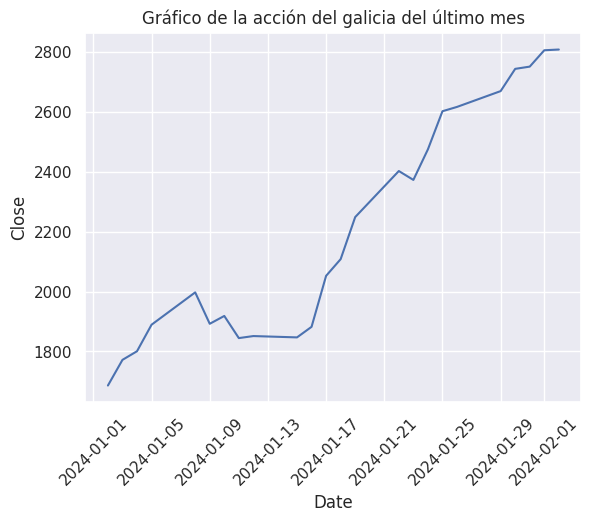

In [83]:
# Utilizamos la librería seaborn para realizar gráficos simples
sns.set_theme(style="darkgrid")
plt.title("Gráfico de la acción del galicia del último mes")
sns.lineplot(x='Date', y= 'Close', data=data_ggal)
plt.xticks(rotation=45)
plt.show